# **Income**

About Dataset
The CIS (Canadian Income Survey) Dataset contains detailed demographic, economic, and employment-related data of individuals across different provinces in Canada. The dataset is designed to assess key factors affecting income levels, employment history, and financial well-being at an individual level.

**🔹 Dataset Overview**

Total Variables: 36 (Covering demographic, employment, and financial attributes)
Purpose: Used for analyzing income distribution, labor market trends, and economic well-being in Canada.
Data Type: A mix of categorical, numerical, and binary data (e.g., Age, Gender, Income, Employment Status).
Key Topics Covered:
Demographics: Age, Gender, Marital Status, Immigrant Status
Education & Employment: Highest Education, Years Worked, Weeks Employed
Financial Data: Income after tax, Capital Gains, Pension, Investments
Social Benefits: Childcare Benefits, Employment Insurance, Government Assistance



The Income Survey Dataset contains detailed socio-economic and demographic information on 72,643 individuals across 38 features. This dataset appears to be derived from a national household income and labor survey, likely focused on measuring various dimensions of income, employment, and education among individuals in Canada (based on column names like CPP/QPP, which refer to Canadian pension plans).

**Key Attributes in the Dataset**
The dataset includes a broad range of variables grouped into the following categories:
1. **Demographic Information**
PersonID: Unique identifier for each respondent.
Province, MBMREGP: Coded values for geographical location.
Age_gap: Indicates age range or actual age gap.
Gender: Likely coded (e.g., 1 = Male, 2 = Female).
Marital_status: Status such as single, married, divorced, etc.
Immigrant, Year_immigrant: Indicates immigration status and year.

2. **Educational Background**
Highschool: Indicates whether the respondent completed high school.
Highest_edu: Coded education levels attained.

3. **Employment Characteristics**
Work_ref, Work_yearly, Emp_week_ref: Reflect employment type or duration.
Total_hour_ref: Total hours worked in a reference period.
paid_emp_ref, self_emp_ref: Indicate employment type (paid or self-employed).

4. **Income and Earnings**
Total_income: Overall income from all sources.
income_after_tax: Net income after deductions.
Salary_wages, Self_emp_income, Private_pension, Old_age_pension, etc.: Specific sources of income.
CPP_QPP: Contributions or payouts from Canadian pension plans.
Child_benefit, Guaranteed_income: Social support indicators.
Cap_gain, Investment, compensation: Reflect capital or investment income.

5. **Household & Living**
Family_mem: Number of family members in the household.
CFCOMP, CONDMP, RENTM: Coded living expenses or rental data.

**🔹 Significance of the Dataset**
✔ Helps policymakers understand income inequality and poverty levels.
✔ Used for research on employment patterns and financial security.
✔ Supports decision-making on government subsidies and social welfare programs.

## **Importing Liberies**

In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

## **Loading Dataset**

In [271]:
df = pd.read_csv("Income Survey Dataset (1).csv")
df.head()

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


### **Visualization of Dataset**

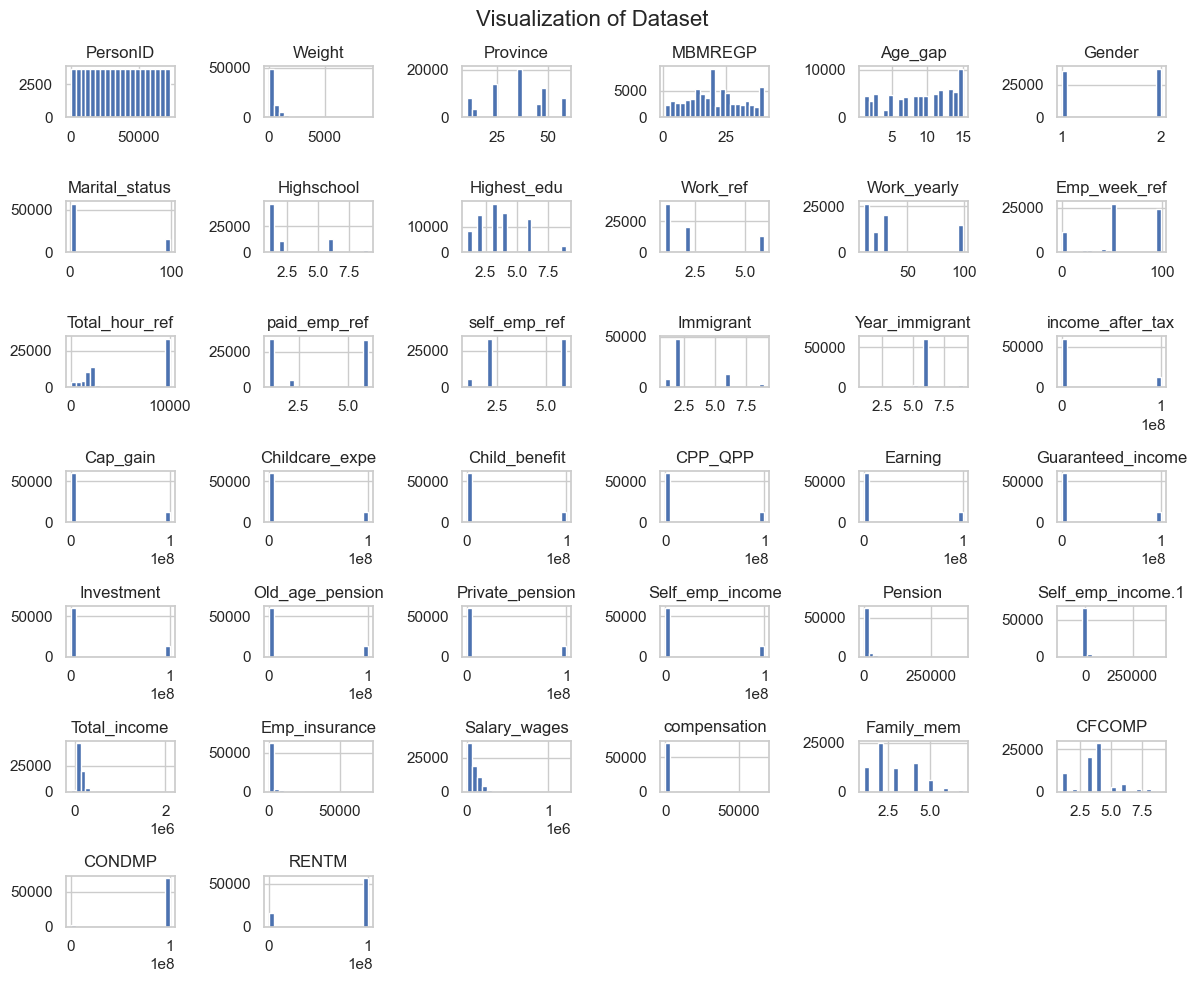

In [272]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Visualization of Dataset", fontsize=16)
plt.tight_layout()
plt.show()

#### **Filling missing values**

In [274]:
# Data processing: fill missing values, encode categoricals, etc.
df_processed = df.copy()

# Example preprocessing (customize based on actual data)
for col in df_processed.select_dtypes(include='object').columns:
    df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    df_processed[col] = pd.factorize(df_processed[col])[0]

for col in df_processed.select_dtypes(include='number').columns:
    df_processed[col].fillna(df_processed[col].mean(), inplace=True)

df_processed.head()

C:\Users\AMANGHULE\AppData\Local\Temp\ipykernel_6292\2006403008.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].mean(), inplace=True)


,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,...,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,...,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,...,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,...,0,0,110875,0,106000,0,4,4,99999996,99999996


### **Visualization of Dataset after filling missing value**

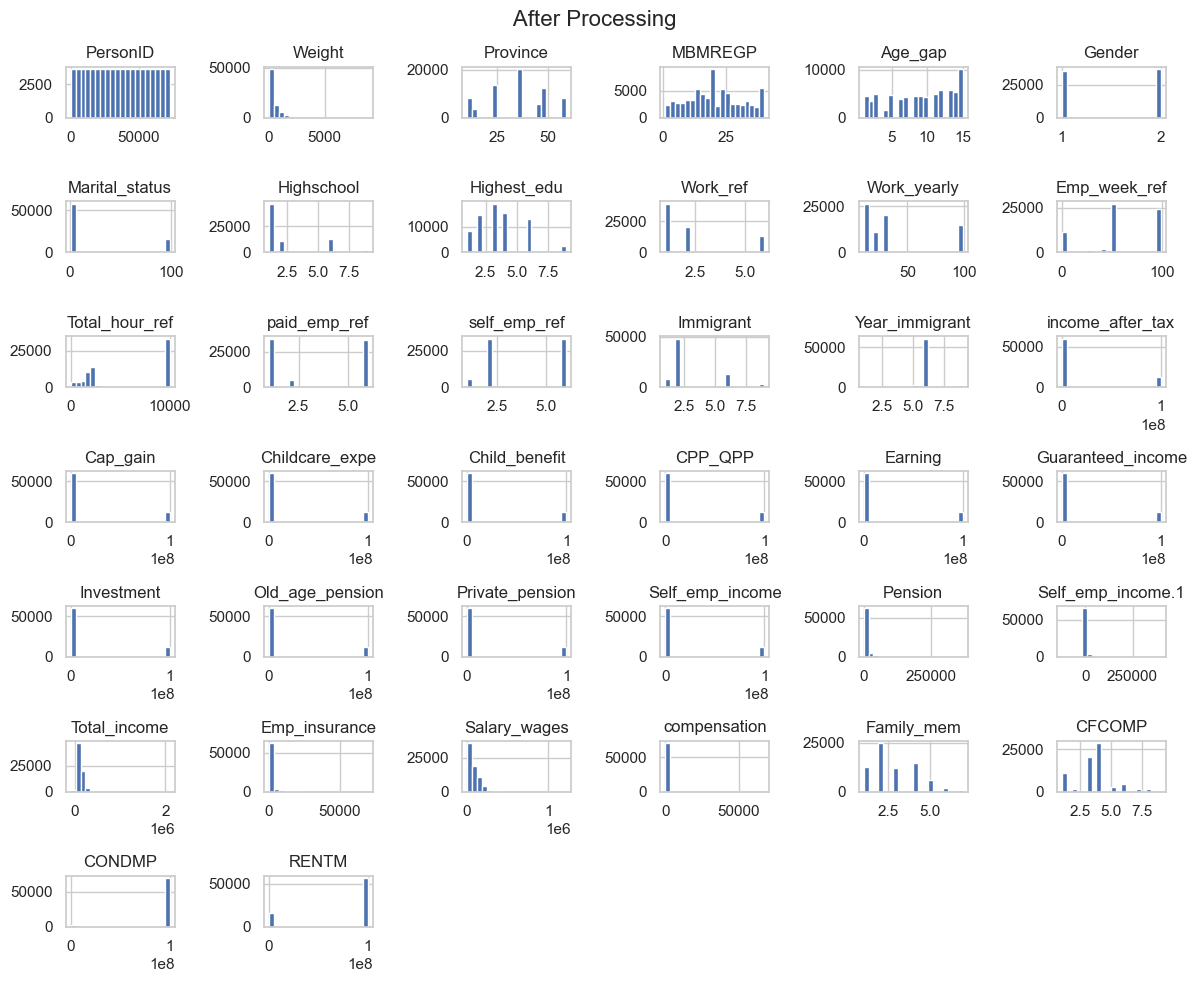

In [337]:
# Plot distributions of numerical features after processing
df_processed.hist(figsize=(12, 10), bins=20)
plt.suptitle(" After Processing", fontsize=16)
plt.tight_layout()
plt.show()

### **Sample data generation**

In [276]:
# Replace this with your actual dataset
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # Features
y = 2.5 * x.squeeze() + np.random.randn(100) * 2  # Target with some noise

### **Create a DataFrame**

In [277]:
data = pd.DataFrame(data=np.hstack((x, y.reshape(-1, 1))), columns=['Feature', 'Target'])

### **Split the data into train and test sets**

In [278]:
x_train, x_test, y_train, y_test = train_test_split(data[['Feature']], data['Target'], test_size=0.2, random_state=42)

## **Models**

### ***Linear Regression***

In [344]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [346]:
# Predictions
y_pred_linear = linear_model.predict(x_test)

# Evaluation for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

Linear Regression:
Mean Absolute Error: 1.60
R-squared: 0.90


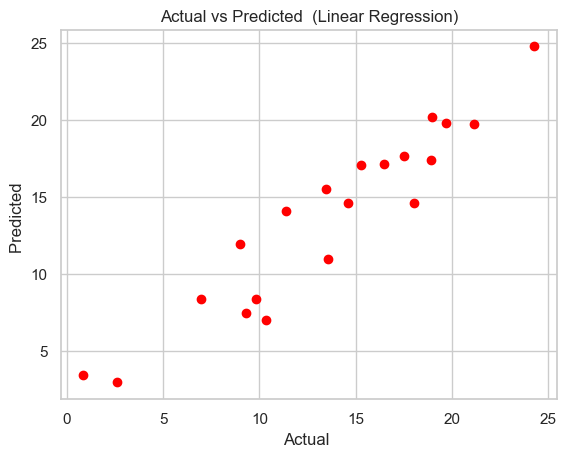

In [348]:
# Scatter plot of actual vs prediction of model
plt.scatter(y_test, y_pred_linear, c='red')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (Linear Regression)')
plt.show()

***Accuracy of Linear Regression is 90%.***

### ***XGBoost Regression***

In [351]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [353]:
# Predictions
y_pred_xgb = xgb_model.predict(x_test)

# Evaluation for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regression:")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"R-squared: {r2_xgb:.2f}")


XGBoost Regression:
Mean Absolute Error: 1.91
R-squared: 0.84


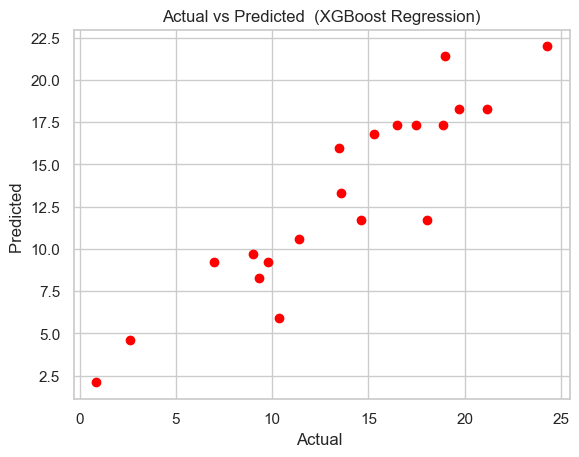

In [363]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_xgb, c='red')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (XGBoost Regression)')
plt.show()


***Accuracy of XGBoost is 84%.***

### ***Tuning for XGBoost***

In [283]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
xgb_grid_search.fit(x_train, y_train)

best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(x_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regression (Tuned):")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"R-squared: {r2_xgb:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

XGBoost Regression (Tuned):
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mean Absolute Error: 1.93
R-squared: 0.85


***Accuracy of XGBoost after tunning is 85%.***

### ***Random Forest Regression***

In [359]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [365]:
# Predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluation for Random Forest Regression
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression:")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Regression:
Mean Absolute Error: 1.68
R-squared: 0.87


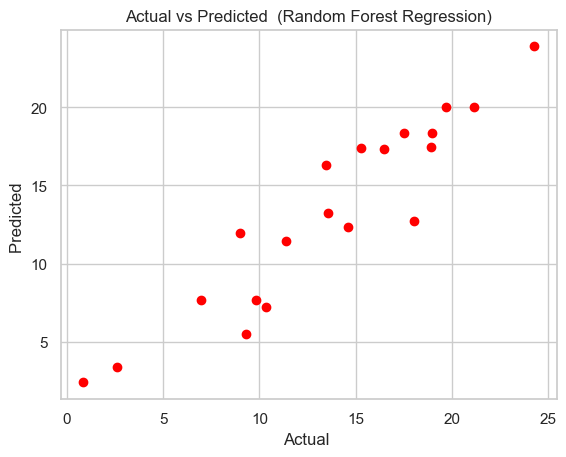

In [320]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_rf, c='red')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (Random Forest Regression)')
plt.show()


***Accuracy of Random Forest Regression is 87%.***

### ***Support Vector Regression***

In [368]:
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

SVR()

In [370]:
# Predictions
y_pred_svr = svr_model.predict(x_test)

# Evaluation for Support Vector Regression
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression:")
print(f"Mean Absolute Error: {mae_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")


Support Vector Regression:
Mean Absolute Error: 1.85
R-squared: 0.87


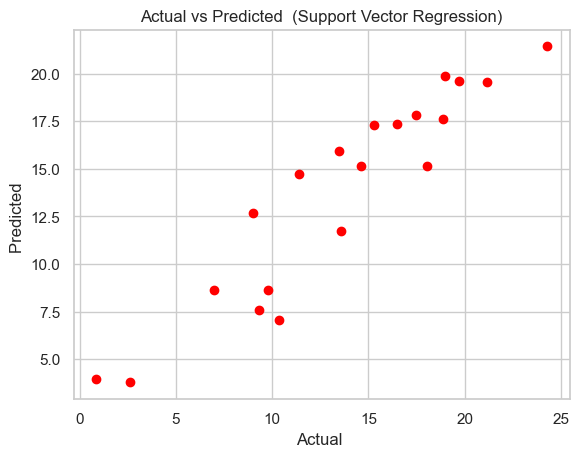

In [384]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_svr, c='red')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (Support Vector Regression)')
plt.show()

***Accuracy of Support Vector Regression is 87%.***

### ***Tuning for Support Vector Regression***

In [287]:
svr_model = SVR()

svr_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

svr_grid_search = GridSearchCV(svr_model, svr_param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
svr_grid_search.fit(x_train, y_train)

best_svr_model = svr_grid_search.best_estimator_
y_pred_svr = best_svr_model.predict(x_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regression (Tuned):")
print(f"Best Parameters: {svr_grid_search.best_params_}")
print(f"Mean Absolute Error: {mae_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Support Vector Regression (Tuned):
Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'linear'}
Mean Absolute Error: 1.65
R-squared: 0.90


***Accuracy of SVR after tunning is 90%.***

### ***Decision Tree Regression***

In [374]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [376]:
# Predictions
y_pred_dt = dt_model.predict(x_test)

# Evaluation for Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regression:")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"R^2 Score: {r2_dt:.2f}")


Decision Tree Regression:
Mean Absolute Error: 1.89
R^2 Score: 0.85


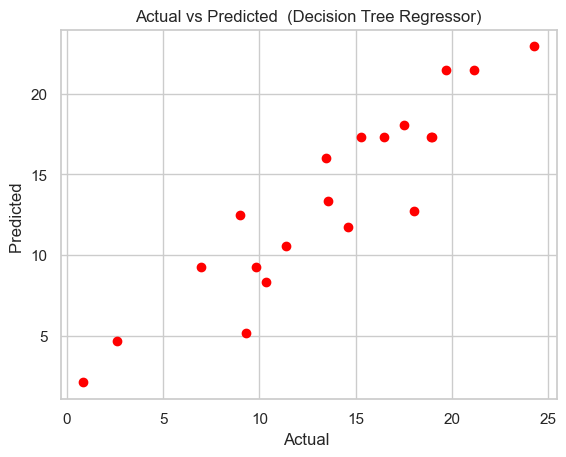

In [388]:
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred_dt, c='red')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.title('Actual vs Predicted  (Decision Tree Regressor)')
plt.show()

***Accuracy of Decision Tree Regressor is 85%.***

## **Conclusion** :

### **Accuracy of models are** :

***Linear Regression           = 90%***





***XGBoost Regression          = 84%    /   After Tunning = 85%***

***Random Forest Regression    = 87%***

***Support Vector Regression   = 87%   /   After Tunning = 90%***

***Decision Tree Regressor     = 85%***